In [12]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt
import math

In [13]:
m = mp.Model()

A = m.add_var(name='HiFi-1', var_type=mp.CONTINUOUS)
B = m.add_var(name='HiFi-2', var_type=mp.CONTINUOUS)

time_1 = 480 - (480 * 0.1)
time_2 = 480 - (480 * 0.14)
time_3 = 480 - (480 * 0.12)

m.objective = mp.minimize((time_1 - (A * 6 + B * 4)) + (time_2 - (A * 5 + B * 5)) + (time_3 - (A * 4 + B * 6)))

m += A * 6 + B * 4 <= time_1
m += A * 5 + B * 5 <= time_2
m += A * 4 + B * 6 <= time_3

m.optimize()

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0006I 0  Obj 0 Dual inf 29.999998 (2)
Clp0000I Optimal - objective value -1238.4
Clp0032I Optimal objective -1238.4 - 2 iterations time 0.002


<OptimizationStatus.OPTIMAL: 0>

In [14]:
print(f"Produção de HiFi-1: {A.x:.0f}")
print(f"Produção de HiFi-2: {B.x:.0f}")
print(f"Mim return: {math.floor(m.objective_value)}")

Produção de HiFi-1: 51
Produção de HiFi-2: 32
Mim return: 28


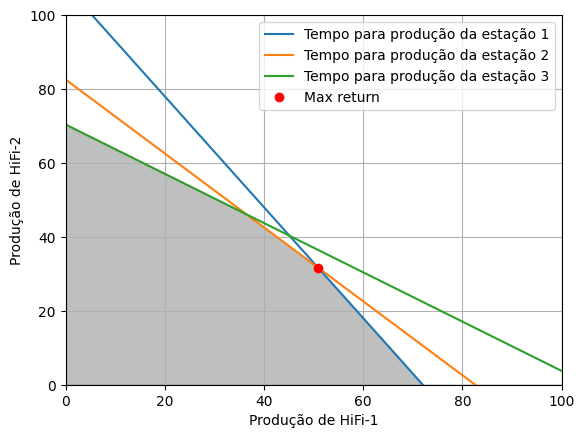

In [15]:
x = np.linspace(0, 100, 200)

r1 = (time_1 - 6 * x) / 4
plt.plot(x, r1, label="Tempo para produção da estação 1")

r2 = (time_2 - 5 * x) / 5
plt.plot(x, r2, label="Tempo para produção da estação 2")

r3 = (time_3 - 4 * x) / 6
plt.plot(x, r3, label="Tempo para produção da estação 3")

plt.xlim(0, 100)
plt.ylim(0, 100)

plt.xlabel("Produção de HiFi-1")
plt.ylabel("Produção de HiFi-2")
plt.plot(A.x, B.x, 'ro', label="Max return")
plt.fill_between(x, 0, np.minimum(np.minimum(r1, r2), r3), color='gray', alpha=0.5)

plt.grid()
plt.legend()
plt.show()